# Biggest frequency of crimes in San Francisco is in early evening and lunchtime

##### Main purpose of this visualization of San Francisco crime incidents is to show how crime frequency changes during day and if this pattern is consistent across all days of the week.

In [37]:
# loading libararies
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)

In [38]:
# loading data Crime data from San Franciso - Summer 2014
sanfrancisco=read.csv("sanfrancisco_incidents_summer_2014.csv")
# extractiong hour variable from Time
sanfrancisco$Time = strptime(sanfrancisco$Time, format="%H:%M")
sanfrancisco$hour = sanfrancisco$Time$hour
# ordering of Day of Week variable for presentation
sanfrancisco$DayOfWeek = factor(sanfrancisco$DayOfWeek, ordered=TRUE, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

## How do incidents vary by time of day

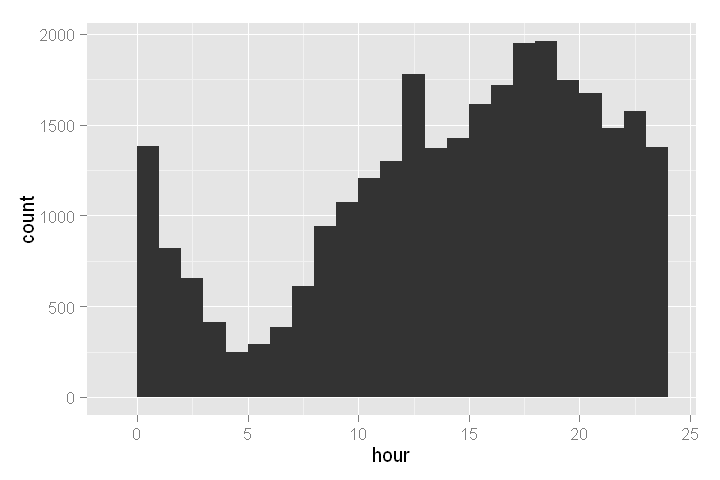

In [39]:
ggplot(data=sanfrancisco, aes(x=hour))+ geom_bar(stat="bin",binwidth=1)

##### The most quite time in terms of incidents is between 4 a.m. and 6 a.m. (16:00 - 18:00) Incidents then gradually increase during the day with the maximum between 5p.m. and 7 p.m. (17:00 - 19:00). As you can see during lunch time there is sudden jump of incidents (12 p.m. to 1p.m)

## How do incidents vary by day of the week

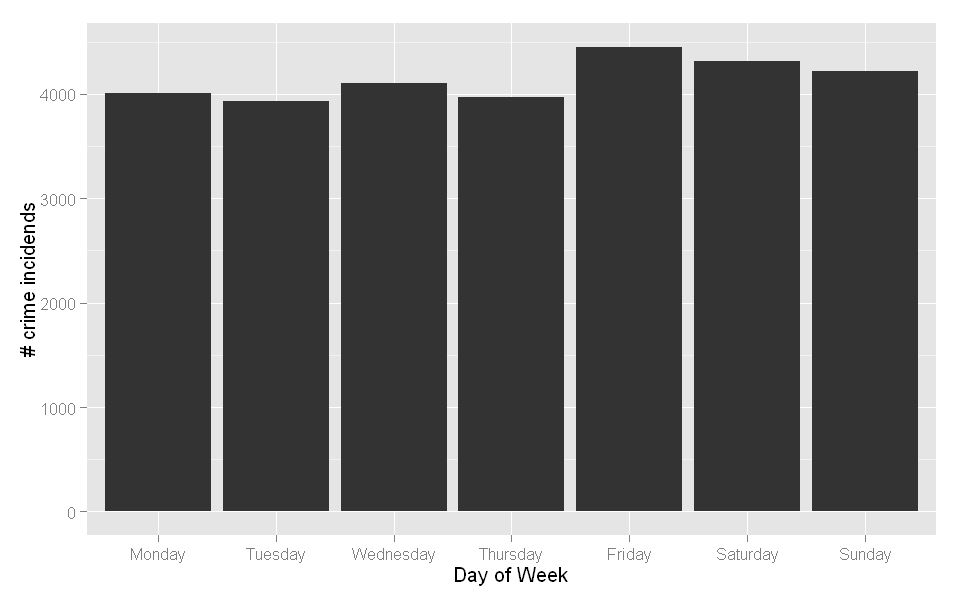

In [43]:
ggplot(data=sanfrancisco, aes(x=DayOfWeek))+ geom_bar(stat="bin",binwidth=1) + xlab("Day of Week") +
  ylab("# crime incidends")

##### The most criminal incidents happen on Friday and Tuesday is a day with the lowest incident frequency. Days can be split into two distinct groups Monday to Thursday as one group of quite similar days and Friday + weekend as a group with higher incidents frequencies.

## Heatmap: Hour vs Day of the week

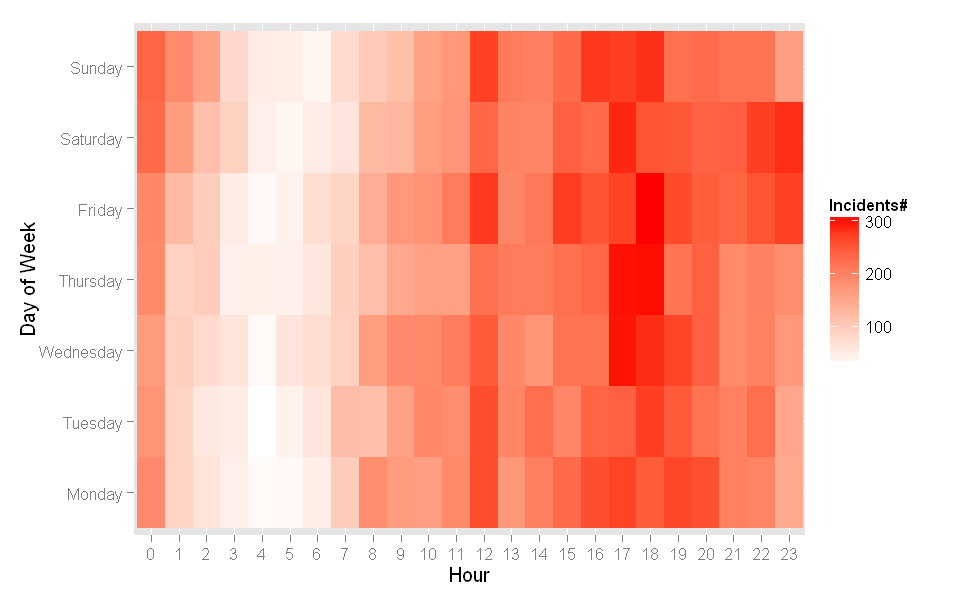

In [48]:
options(repr.plot.width=8, repr.plot.height=5)
hour_week_data = as.data.frame(table(sanfrancisco$hour,sanfrancisco$DayOfWeek))
names(hour_week_data)[names(hour_week_data)=="Var2"] = "DayOfWeek"
names(hour_week_data)[names(hour_week_data)=="Var1"] = "Hour"
hour_week_data$DayOfWeek = factor(hour_week_data$DayOfWeek, ordered=TRUE, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))
ggplot(data=hour_week_data, aes(x=Hour, y=DayOfWeek)) + geom_tile(aes(fill = Freq)) + scale_fill_gradient(low="white", high="red", name="Incidents#") + ylab("Day of Week")


##### By plotting day of week against hour we can see why Friday and Saturday has the highest number of incidents. It is mainly caused by incidents happening in later hours (21:00 +).  In other hours it is not so much different from other week days. We can also see that after night with higher crime frequencies, there is lower freqency between 8a-10am.


##### Summary: 
- There is consistent pattern in how crime frequency changes during the day. The minimum is around 4am to 6am and then it gradually increases with maximum between 4pm-6pm then it start to decrease again. 
- There is one exception from this patter and is it lunch time (12pm to 1pm)
- Friday is the day with most crime incidents, however it is thanks to higher crime frequency in later hours. Frequencies during the day are similar to other weekdays. 
- Higher late night activity during Friday and Saturday is followed by weaker crime frequencies during following morning (between 8am and 10am)


